# Advanced Deep Learning for NLP - Text based adventure game RL


WIP: Links not assigned yet

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

## Google Colab stuff

In [1]:
%%capture
!pip install tf-agents
!pip install textworld
!pip install -q -U tensorflow-text
!pip install tensorflow-text

from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/MyDrive/DeepLearningNLP/")

Or alternatively (for future, when project not private anymore):

In [ ]:
!git clone https://github.com/

Cloning into 'github.com'...
fatal: repository 'https://github.com/' not found


## Imports

In [2]:
from resources import DEFAULT_PATHS
# from tests import test_environment_creation

from tf_train_loop import TWTrainer

%load_ext autoreload
%autoreload 2

## Generate games


Only run of necessary.

In [ ]:
os.chdir("/content/drive/MyDrive/DeepLearningNLP/scripts/")

In [ ]:
%%shell
bash ./make_debug_game.sh

Global seed: 2021
Game generated: /content/drive/My Drive/DeepLearningNLP/resources/game_th_lvl2_simple.ulx


In [ ]:
%%capture
%%shell
bash ./make_allgames.sh

In [ ]:
os.chdir("/content/drive/MyDrive/DeepLearningNLP/")

# Test environment

In [ ]:
test_environment_creation()

# Train

In [3]:
REWARD_DICT = {
    "win_lose_value": 100,
    "max_loop_pun": 0,
    "change_reward": 1,
    "useless_act_pun": 1,
    "verb_in_adm": 1,
}

Try overfitting on one debug game (correct command "take x" will immediately win or lose the game):


step = 25: loss = 8.91e+01, Buff-len = 36
step = 25: Average Return = 1.0
step = 50: loss = 8.87e+02, Buff-len = 38
step = 50: Average Return = 0.0
step = 75: loss = 3.89e+03, Buff-len = 44
step = 75: Average Return = 0.0
step = 100: loss = 1.55e+04, Buff-len = 47
step = 100: Average Return = 0.0
step = 125: loss = 6.03e+04, Buff-len = 48
step = 125: Average Return = 0.0
step = 150: loss = 1.34e+05, Buff-len = 69
step = 150: Average Return = 50.0
step = 175: loss = 1.37e+05, Buff-len = 142
step = 175: Average Return = 0.0
step = 200: loss = 1.56e+05, Buff-len = 146
step = 200: Average Return = 0.0
step = 225: loss = 1.33e+05, Buff-len = 187
step = 225: Average Return = 0.0
step = 250: loss = 4.06e+05, Buff-len = 188
step = 250: Average Return = -50.0
step = 275: loss = 2.12e+05, Buff-len = 210
step = 275: Average Return = -50.0
step = 300: loss = 4.09e+05, Buff-len = 271
step = 300: Average Return = 50.0
step = 325: loss = 6.27e+05, Buff-len = 277
step = 325: Average Return = -50.0
ste

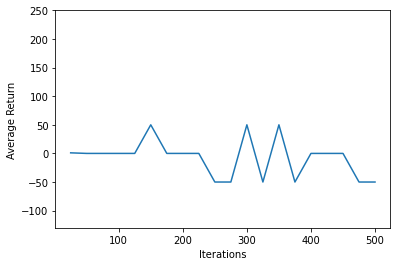

In [5]:
DEFAULT_HP = {
    "learning_rate": 1e-3,
    "initial_collect_steps": 2000,
    "collect_steps_per_iteration": 1,
    "replay_buffer_max_length": 100000,
    # large values lead to OOM with bert policy
    "batch_size": 32,
    "num_eval_episodes": 1,
    "game_gen_buffer": 25,
    "num_eval_games": 5,
}
trainer = TWTrainer(
    reward_dict=REWARD_DICT,
    hpar=DEFAULT_HP,
    debug=False,
    biased_buffer=True,
    # embedding into fc is default policy
    # agent_label="FCPolicy",
    agent_label="BertPolicy",
)
eval_scores = trainer.train(
    num_iterations=500,
    log_interval=25,
    eval_interval=25,
    game_gen_interval=500,
    plot_avg_ret=True,
)

In [ ]:
pathdir = DEFAULT_PATHS["path_logdir"]
%load_ext tensorboard
%tensorboard --logdir $pathdir


In [ ]:
DEFAULT_HP = {
    "learning_rate": 1e-3,
    "initial_collect_steps": 10000,
    "collect_steps_per_iteration": 1,
    "replay_buffer_max_length": 100000,
    "batch_size": 32,
    "num_eval_episodes": 1,
    "game_gen_buffer": 25,
    "num_eval_games": 10,
}

trainer = TWTrainer(
    env_dir="train_games_lvl1",
    reward_dict=REWARD_DICT,
    hpar=DEFAULT_HP,
    debug=False,
    biased_buffer=True,
    # embedding into fc is default policy
    # agent_label="FCPolicy",
    agent_label="BertPolicy",
)

In [ ]:
print(f"Starting with lvl: 1 \n")

eval_scores = trainer.train(
    num_iterations=2000,
    log_interval=250,
    eval_interval=500,
    game_gen_interval=500,
    rndm_fill_replay=True,
    plot_avg_ret=True,
)

Changing to next lvl: 2 

step = 250: loss = 9.68e+09, Buff-len = 792
step = 500: loss = 1.74e+10, Buff-len = 817
step = 500: Average Return = -4.0
step = 750: loss = 2.90e+10, Buff-len = 836
step = 1000: loss = 5.06e+10, Buff-len = 862
step = 1000: Average Return = -44.0
step = 1250: loss = 9.41e+10, Buff-len = 889
step = 1500: loss = 1.30e+11, Buff-len = 922
step = 1500: Average Return = -49.0
step = 1750: loss = 2.35e+11, Buff-len = 946
step = 2000: loss = 4.21e+11, Buff-len = 975
step = 2000: Average Return = -49.0
(4,) [ 500 1000 1500 2000]
(4,) [ -4. -44. -49. -49.]


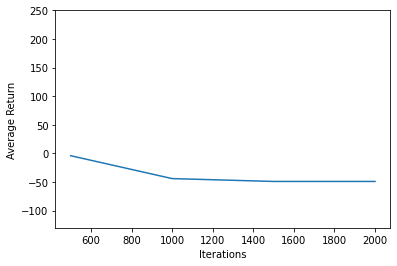

In [9]:
print(f"Changing to next lvl: 2 \n")

trainer.change_env_dir(f"train_games_lvl2")
eval_scores = trainer.train(
    num_iterations=2000,
    log_interval=250, 
    eval_interval=500,
    game_gen_interval=500,
    continue_training=True,
    rndm_fill_replay=True,
    plot_avg_ret=True,
)

In [10]:
print(f"Changing to next lvl: 3 \n")

trainer.change_env_dir(f"train_games_lvl3")
eval_scores = trainer.train(
    num_iterations=2000,
    log_interval=250, 
    eval_interval=500,
    game_gen_interval=500,
    continue_training=True,
    rndm_fill_replay=True,
    plot_avg_ret=True,
)

Changing to next lvl: 3 



KeyboardInterrupt: ignored

In [ ]:
print(f"Changing to next lvl: 4 \n")

trainer.change_env_dir(f"train_games_lvl4")
eval_scores = trainer.train(
    num_iterations=5000,
    log_interval=250, 
    eval_interval=500,
    game_gen_interval=500,
    continue_training=True,
    rndm_fill_replay=True,
    plot_avg_ret=True,
)

## Hyper parameter search

In [ ]:
%%capture
!pip install optuna
import optuna

In [ ]:
def objective(trial):
    """"""

    hp_dict = {
      "num_iterations": 2000,
      "learning_rate": trial.suggest_loguniform("lr", 1e-4, 1e-2),
      "initial_collect_steps": 10000,
      "collect_steps_per_iteration": 1,
      "replay_buffer_max_length": 100000,
      "batch_size": trial.suggest_int("batch_size", 16, 256),
      "log_interval": 500,
      "num_eval_episodes": 1,
      "eval_interval": 100,
    }

    REWARD_DICT = {
        "win_lose_value": 100,
        "max_loop_pun": 1,
        "change_reward": 1,
        "useless_act_pun": 1,
        "verb_in_adm": 1,
    }

    eval_scores = train.main(plot_avg_ret=True, debug=False, reward_dict=REWARD_DICT, **hp_dict)
    # eval_scores = np.delete(eval_scores, 0)

    return max(eval_scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)
print(study.best_trial)

In [ ]:
print(study.best_trial)

FrozenTrial(number=0, values=[203.0], datetime_start=datetime.datetime(2021, 7, 30, 11, 46, 26, 924586), datetime_complete=datetime.datetime(2021, 7, 30, 11, 50, 2, 140224), params={'lr': 0.004015582546958087, 'batch_size': 89}, distributions={'lr': LogUniformDistribution(high=0.01, low=0.0001), 'batch_size': IntUniformDistribution(high=256, low=16, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)
